In [3]:
import pandas as pd
import numpy as np

In [27]:
def get_yeastract_data(yeastract_csv_filename, gene_to_orf_filename="tftoorf.csv", as_orf=False):
    '''
    Returns Yeastract network data as a pandas DataFrame.
    '''
    def tf_to_gene(tf_name):
        '''
        Removes trailing "p" from transcription factor name and turn into uppercase.
        '''
        if tf_name[-1] == 'p':
            return tf_name.upper()[:-1]
        else:
            return tf_name
    
    yeastract_data = pd.read_csv(yeastract_csv_filename, sep= ";")
    gene_to_orf_df = pd.read_csv(gene_to_orf_filename)
    
    tf_list = list(yeastract_data['6855'])
    gene_list = list(yeastract_data.columns.values)[1:]
    
    # Fix dataframe so it has right things as rownames.
    yeastract_data = yeastract_data.rename(index=yeastract_data['6855'])
    yeastract_data = yeastract_data.iloc[:, 1:]
    
    tf_list = [tf_to_gene(tf) for tf in tf_list]
    if as_orf:
        gene_to_orf = dict(zip(list(gene_to_orf_df.iloc[:,0]), list(gene_to_orf_df.iloc[:,2])))
        
        rownames = [gene_to_orf[tf] for tf in tf_list]
        # Change to TF if possible, otherwise keep same name.
        colnames = [gene_to_orf.get(gene, gene) for gene in gene_list]
    else:
        rownames = tf_list
        colnames = gene_list
    
    final_data = pd.DataFrame(np.array(yeastract_data), index=rownames, columns=colnames)
    
    return final_data

def get_gasch_data(gasch_data_filename="complete_dataset_gasch.txt", 
                   orf_to_gene_filename="orfname_time_course_fixed.csv",
                   as_orf=False):
    '''
    Returns heat shock time-course data from Gasch as DataFrame.
    '''
    gasch_data = pd.read_csv(gasch_data_filename, sep="\t")
    gasch_data = gasch_data.iloc[:,:11] # Filter only heat-shock data from first experiment (hs-1).
    
    if not as_orf:
        # Rename as genes.
        orf_to_gene_df = pd.read_csv(orf_to_gene_filename)
        orfs = list(orf_to_gene_df.iloc[:,0])
        genes = list(orf_to_gene_df.iloc[:,3])
        
        # Remove unknowns, keep original name.
        genes = [gene if gene != 'Unknown' else orfs[i] for i, gene in enumerate(genes)]
        orf_to_gene = dict(zip(orfs, genes))
        
        orf_list = list(gasch_data["UID"])
        gene_names = [orf_to_gene.get(orf, orf) for orf in orf_list]
        #print(gene_names)
        gasch_data["UID"] = gene_names
    return gasch_data
    

def squarify(df, sort=False):
    '''
    Turns Yeastract DataFrame into a square dataframe (i.e. adjacency matrix).
    '''
    cols=list(df.columns)
    rows=list(df.index)
    d = []
    for x in cols:
        if x in rows:
            d.append(list(df.loc[x]))
        else:
            d.append([0]*len(cols))
    A = np.array(d)
    return pd.DataFrame(A, index=cols, columns=cols)

def reorder(target_orf, adj_matrix):
    A = target_orf #input the list of target orf name
    B = adj_matrix #input the adj matrix

    #First we want to extract the header from the adj matrix and compare them with the list

    B_header = list(B)

    AB_diff = list(set(B_header) - set(A))
    #print(set(A)<set(B_header))
    A_total = A + AB_diff
    print(len(set(B_header)), len(set(A)), len(AB_diff), len(A_total))
    B = B[A_total]
    B = B.reindex(A_total)
    return B

In [28]:
orf_to_gene_filename="orfname_time_course_fixed.csv"
orf_to_gene_df = pd.read_csv(orf_to_gene_filename)
orf_to_gene_df

,Inserted List,Unnamed: 1,ORF Name,Gene Name
0,YAL001C,NaN,YAL001C,TFC3
1,YAL002W,NaN,YAL002W,VPS8
2,YAL003W,NaN,YAL003W,EFB1
3,YAL004W,NaN,YAL004W,YAL004W
4,YAL005C,NaN,YAL005C,SSA1
5,YAL007C,NaN,YAL007C,ERP2
6,YAL008W,NaN,YAL008W,FUN14
7,YAL009W,NaN,YAL009W,SPO7
8,YAL010C,NaN,YAL010C,MDM10
9,YAL011W,NaN,YAL011W,SWC3


In [29]:
yeastract_data = get_yeastract_data("dna_only_yeastnet_full.csv")
gasch_data = get_gasch_data()


In [30]:
A = squarify(yeastract_data)

In [31]:
ordered_A = reorder(list(gasch_data['UID']), A)
ordered_A

6855 6152 742 6894


KeyError: "['YAL035C-A' 'YAL043C-A' 'YAL058C-A' 'YAL069W' 'YBR100W' 'YCL006C'\n 'YCL012W' 'YCL022C' 'YCR062W' 'YCR103C' 'YEL076W-C' 'YER087C-A'\n 'YFL013W-A' 'YFL043C' 'YFR024C' 'YGL046W' 'YIL015C-A' 'YIL082W' 'YJL018W'\n 'YJL021C' 'YKL158W' 'YKL199C' 'YKR035C' 'YLL044W' 'YLL047W' 'YLR434C'\n 'YML010C-B' 'YML013C-A' 'YML032C-A' 'YML033W' 'YML035C-A' 'YML048W-A'\n 'YML058C-A' 'YML095C-A' 'YML102C-A' 'YML117W-A' 'YMR158W-A' 'YOR088W'\n 'YOR240W'] not in index"

In [38]:
missing = ['YAL035C-A', 'YAL043C-A', 'YAL058C-A', 'YAL069W', 'YBR100W', 'YCL006C', 'YCL012W', 'YCL022C', 'YCR062W',
           'YCR103C', 'YEL076W-C', 'YER087C-A', 'YFL013W-A', 'YFL043C', 'YFR024C', 'YGL046W', 'YIL015C-A', 'YIL082W',
           'YJL018W', 'YJL021C', 'YKL158W', 'YKL199C', 'YKR035C', 'YLL044W', 'YLL047W', 'YLR434C', 'YML010C-B',
           'YML013C-A', 'YML032C-A', 'YML033W', 'YML035C-A', 'YML048W-A', 'YML058C-A', 'YML095C-A', 'YML102C-A',
           'YML117W-A', 'YMR158W-A', 'YOR088W', 'YOR240W']

In [40]:
gasch_data[gasch_data['UID'] == 'YBR100W']

,UID,NAME,GWEIGHT,Heat Shock 05 minutes hs-1,Heat Shock 10 minutes hs-1,Heat Shock 15 minutes hs-1,Heat Shock 20 minutes hs-1,Heat Shock 30 minutes hs-1,Heat Shock 40 minutes hs-1,Heat Shock 60 minutes hs-1,Heat Shock 80 minutes hs-1
325,YBR100W,YBR100W UNKNOWN ...,1,2.02,0.29,-0.1,-0.03,-0.14,NaN,0.06,0.2


In [106]:
import networkx as nx
network = nx.DiGraph(data=np.array(A))
names = list(A)
network = nx.relabel_nodes(network, {i:name for i, name in enumerate(names)})

In [109]:
network.out_degree("HSF1")

240

In [110]:
network.in_degree("HSF1")

5

In [50]:
list(network.neighbors("HSF1"))

['FES1',
 'YBR116C',
 'TKL2',
 'TEF2',
 'SSE2',
 'FTH1',
 'RIF1',
 'KRR1',
 'APA1',
 'HSP30',
 'YDL180W',
 'YDL177C',
 'YDL176W',
 'UBX3',
 'RPN4',
 'RPT2',
 'YDR010C',
 'SNQ2',
 'PSF1',
 'MAK21',
 'YDR061W',
 'PAA1',
 'INO2',
 'YDR124W',
 'ARO1',
 'VPS61',
 'HPR1',
 'CTH1',
 'GIR2',
 'YDR154C',
 'CPR1',
 'RPA14',
 'YDR157W',
 'HOM2',
 'SEC1',
 'TRM82',
 'HSP42',
 'ATC1',
 'UPC2',
 'AHA1',
 'HSP78',
 'YAP6',
 'EXG2',
 'BSC2',
 'RNH202',
 'GIC2',
 'PIB1',
 'HXT3',
 'ATP17',
 'JIP4',
 'YEL045C',
 'AFG3',
 'EDC2',
 'ARB1',
 'PHM8',
 'RPS8b',
 'SSA4',
 'ACT1',
 'MDJ1',
 'HSP12',
 'PMR1',
 'ROG1',
 'SDS23',
 'PNC1',
 'YGL036W',
 'PMA1',
 'BRP1',
 'PMC1',
 'YGR050C',
 'VPS62',
 'BTN2',
 'ECL1',
 'CHO2',
 'RTS3',
 'TDH3',
 'XKS1',
 'SKI6',
 'SNG1',
 'YPP1',
 'YGR210C',
 'ZPR1',
 'SOL4',
 'MGA1',
 'RIE1',
 'NOP19',
 'FSH1',
 'CUP1-1',
 'CUP1-2',
 'KSP1',
 'SAM35',
 'GRE3',
 'YAP1801',
 'YHR173C',
 'ENO2',
 'STB5',
 'FKH1',
 'MET28',
 'DAL7',
 'RPA34',
 'YJL144W',
 'SSC1',
 'TAH11',
 'CYC1',
 '

In [112]:
deg = nx.degree(network)

In [111]:
network.out_degree("HSF1")

240

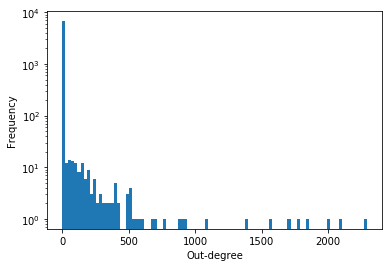

In [138]:
out_degree = network.out_degree(network.nodes())
out_degree = [deg[1] for deg in out_degree]
plt.hist(out_degree, bins=100, log=True)
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.show()

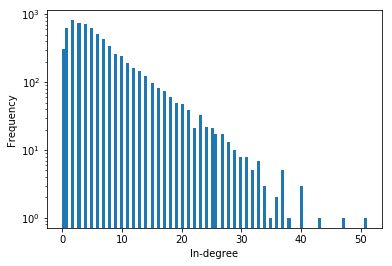

In [139]:
in_degree = network.in_degree(network.nodes())
in_degree = [deg[1] for deg in in_degree]
plt.hist(in_degree, bins=100, log=True)
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.show()

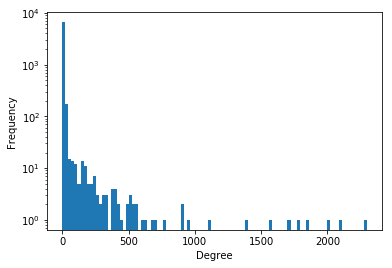

In [140]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

plt.hist(list(dict(deg).values()), bins=100, log=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [141]:
cls = nx.closeness_centrality(network)

In [146]:
?nx.closeness_centrality

In [144]:
cls["HSF1"]

0.005395389553545375

In [150]:
[x for x in cls if cls[x] > 0.009]

['YCL065W',
 'YCR018C-A',
 'MAK32',
 'HMRA2',
 'ADH7',
 'AAD3',
 'SNQ2',
 'ENA1',
 'RSM10',
 'YDR042C',
 'SED1',
 'TVP23',
 'YDR543C',
 'YDR544C',
 'YRF1-1',
 'YER189W',
 'YRF1-2',
 'IGD1',
 'ERG26',
 'MSR1',
 'RPI1',
 'FLO11',
 'RPA34',
 'UTH1',
 'YRF1-5',
 'GID8',
 'YMR135W-A',
 'GAT2',
 'MRPL24',
 'ICY1',
 'YRF1-6',
 'YNL338W',
 'YNL337W',
 'ZWF1',
 'SFG1',
 'YRF1-7',
 'YBL111C',
 'YBL109W',
 'YBL029W']

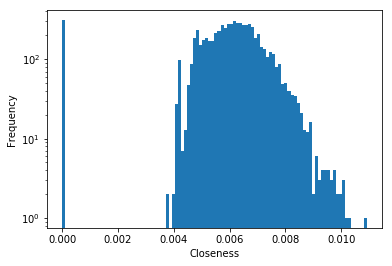

In [143]:
plt.hist(list(dict(cls).values()), bins=100, log=True)
plt.xlabel("Closeness")
plt.ylabel("Frequency")
plt.show()

In [53]:
bet = nx.betweenness_centrality(network)

KeyboardInterrupt: 

In [80]:
np.sum(np.array(A))

44781

In [79]:
A

,PAU8,SEO1,YAL066W,YAL065C,YAL064W-B,TDA8,YAL064W,FLO9,YBR089W,NHP6b,...,YER145C-A,YER190C-B,YGL194C-A,YIL102C-A,YJL077W-A,YKL023C-A,YKL065W-A,YPR010C-A,YPR145C-A,tX(XXX)L
PAU8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SEO1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YAL066W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YAL065C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YAL064W-B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TDA8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YAL064W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FLO9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YBR089W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NHP6b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
?np.array